In [1]:
# Created by: Dušan Radivojević 10.2020
# Libraries
from scipy import signal
from scipy.signal import argrelextrema,savgol_filter
import numpy as np
import matplotlib.pyplot as plt
import serial
import time
import math

In [2]:
# Duration of sempling in second
duration=7

In [3]:
# Open serial port
try:
    serialPort = serial.Serial(port = "COM3", baudrate=115200,
                           bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE)
except serial.SerialException as e:
    print("Please check if the serial port is connected properly!")
    print("Message:",e)

In [4]:
# Put finger on the sensor and wait to the execution end
# Software reset of serial port
serialPort.close()
serialPort.open()
# Measurement
T0=time.time()
my_list=[]
while(T0>(time.time()-(duration+1))):
    # Wait until there is data waiting in the serial buffer
    if(serialPort.in_waiting > 0):
        # Read data out of the buffer and put them in the list
        serialString = serialPort.readline()
        serialString1=str(serialString.decode('Ascii'))
        my_list.append(serialString1.split(","))
       

In [5]:
# Convert to intiger array
my_list_Int=[]
cupple=[]
for i in range (len(my_list)):
    try:
        if (len(my_list[i])==2):
            cupple.append(int(my_list[i][0]))
            cupple.append(int(my_list[i][1]))
            my_list_Int.append(cupple)
            cupple=[]
    except ValueError:
        cupple=[]
        print("error in {0}. line".format(i))
        i+=1  
print("Len of sample: ",len(my_list_Int))


error in 53. line
error in 134. line
error in 229. line
error in 386. line
Len of sample:  396


Lenth of the sensor array:  381


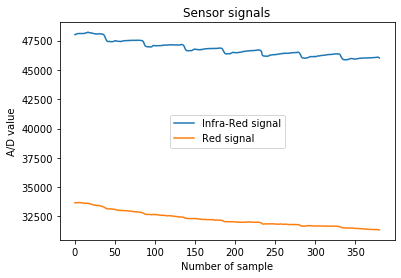

In [6]:
# Reject small values
my_new_Int_List=[]
for i in range(len(my_list_Int)):
    if ((my_list_Int[i][0]>10000) and (my_list_Int[i][1]>10000)):
        my_new_Int_List.append(my_list_Int[i])
plt.plot(my_new_Int_List)
plt.title('Sensor signals')
plt.ylabel('A/D value')
plt.xlabel('Number of sample')
plt.legend(['Infra-Red signal', 'Red signal'], loc='center')
print("Lenth of the sensor array: ",len(my_new_Int_List))

In [7]:
# Separate and cut down arrays
IR_array=[]
Red_array=[]
for i in range (50*duration):
    IR_array.append(my_new_Int_List[i][0])
    Red_array.append(my_new_Int_List[i][1])
IR_AC_arr=signal.detrend(IR_array)
Red_AC_arr=signal.detrend(Red_array)

All minimums:  [[ 49  96 147 195 243 291 342]]
Adequate minimums:  [ 49  96 147 195 243 291 342]


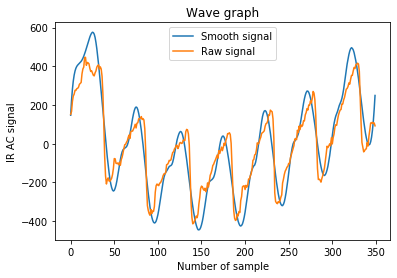

In [8]:
# Find IR max and min extrem
Smooth_ir_ac_arr=savgol_filter(IR_AC_arr,47,5)*1.3
IR_max_arr_large=argrelextrema(Smooth_ir_ac_arr,np.greater)
IR_min_arr_large=argrelextrema(Smooth_ir_ac_arr,np.less)
suma=0
IR_max_arr=[]
fl=0
for i in range (len(IR_max_arr_large[0])-1):
    suma+=IR_max_arr_large[0][i+1]-IR_max_arr_large[0][i]
average=suma/(len(IR_max_arr_large[0])-1)
for i in range (len(IR_max_arr_large[0])-1):
    if((IR_max_arr_large[0][i+1]-IR_max_arr_large[0][i])>=average-4):
        if (fl==0):
            IR_max_arr.append(IR_max_arr_large[0][i])
        else:
            fl=0
        if(i==(len(IR_max_arr_large[0])-2)):
            IR_max_arr.append(IR_max_arr_large[0][i+1])
    else:
        if (Smooth_ir_ac_arr[i]>Smooth_ir_ac_arr[i+1]):
            if (fl==0):
                IR_max_arr.append(IR_max_arr_large[0][i])
                fl=1
            else:
                fl=0
        else:
            if (fl==0):
                IR_max_arr.append(IR_max_arr_large[0][i+1])
                fl=1
            else:
                fl=0
suma=0
IR_min_arr=[]
fl=0
for i in range (len(IR_min_arr_large[0])-1):
    suma+=IR_min_arr_large[0][i+1]-IR_min_arr_large[0][i]
average=suma/(len(IR_min_arr_large[0])-1)
for i in range (len(IR_min_arr_large[0])-1):
    if((IR_min_arr_large[0][i+1]-IR_min_arr_large[0][i])>=average-4):
        if (fl==0):
            IR_min_arr.append(IR_min_arr_large[0][i])
        else:
            fl=0
        if(i==(len(IR_min_arr_large[0])-2)):
            IR_min_arr.append(IR_min_arr_large[0][i+1])
    else:
        if (Smooth_ir_ac_arr[i]<Smooth_ir_ac_arr[i+1]):
            if (fl==0):
                IR_min_arr.append(IR_min_arr_large[0][i])
                fl=1
            else:
                fl=0
        else:
            if (fl==0):
                IR_min_arr.append(IR_min_arr_large[0][i+1])
                fl=1
            else:
                fl=0
plt.plot(Smooth_ir_ac_arr)
plt.plot(IR_AC_arr)
plt.title('Wave graph')
plt.ylabel('IR AC signal')
plt.xlabel('Number of sample')
plt.legend(['Smooth signal', 'Raw signal'], loc='best')
print("All minimums: ",np.array(IR_min_arr_large))
print("Adequate minimums: ",np.array(IR_min_arr))

All minimums: [[ 51  64  96 116 145 163 192 239 286 340]]
Adequate minimums: [ 51  96 145 192 239 286 340]


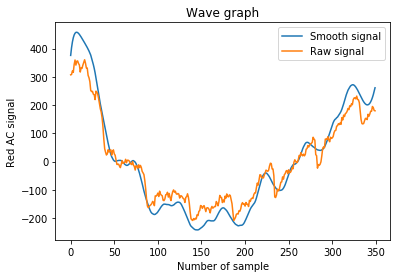

In [9]:
#Find Red max and min extrem
Smooth_red_ac_arr=savgol_filter(Red_AC_arr,47,5)*1.3
Red_max_arr_large=argrelextrema(Smooth_red_ac_arr,np.greater)
Red_min_arr_large=argrelextrema(Smooth_red_ac_arr,np.less)
suma=0
Red_max_arr=[]
fl=0
for i in range (len(Red_max_arr_large[0])-1):
    suma+=Red_max_arr_large[0][i+1]-Red_max_arr_large[0][i]
average=suma/(len(Red_max_arr_large[0])-1)
for i in range (len(Red_max_arr_large[0])-1):
    if((Red_max_arr_large[0][i+1]-Red_max_arr_large[0][i])>=average-4):
        if (fl==0):
            Red_max_arr.append(Red_max_arr_large[0][i])
        else:
            fl=0
        if(i==(len(Red_max_arr_large[0])-2)):
            Red_max_arr.append(Red_max_arr_large[0][i+1])
    else:
        if (Smooth_red_ac_arr[i]>Smooth_red_ac_arr[i+1]):
            if (fl==0):
                Red_max_arr.append(Red_max_arr_large[0][i])
                fl=1
            else:
                fl=0
        else:
            if (fl==0):
                Red_max_arr.append(Red_max_arr_large[0][i+1])
                fl=1
            else:
                fl=0
suma=0
Red_min_arr=[]
fl=0
for i in range (len(Red_min_arr_large[0])-1):
    suma+=Red_min_arr_large[0][i+1]-Red_min_arr_large[0][i]
average=suma/(len(Red_min_arr_large[0])-1)
for i in range (len(Red_min_arr_large[0])-1):
    if((Red_min_arr_large[0][i+1]-Red_min_arr_large[0][i])>=average-4):
        if (fl==0):
            Red_min_arr.append(Red_min_arr_large[0][i])
        else:
            fl=0
        if(i==(len(Red_min_arr_large[0])-2)):
            Red_min_arr.append(Red_min_arr_large[0][i+1])
    else:
        if (Smooth_red_ac_arr[i]<Smooth_red_ac_arr[i+1]):
            if (fl==0):
                Red_min_arr.append(Red_min_arr_large[0][i])
                fl=1
            else:
                fl=0
        else:
            if (fl==0):
                Red_min_arr.append(Red_min_arr_large[0][i+1])
                fl=1
            else:
                fl=0
plt.plot(Smooth_red_ac_arr)
plt.plot(Red_AC_arr)
plt.title('Wave graph')
plt.ylabel('Red AC signal')
plt.xlabel('Number of sample')
plt.legend(['Smooth signal', 'Raw signal'], loc='best')
print("All minimums:",np.array(Red_min_arr_large))
print("Adequate minimums:",np.array(Red_min_arr))

In [10]:
# Calculation of AC p-p
min_acc_red=0
for i in range (len(Red_min_arr)):
    min_acc_red+=Smooth_red_ac_arr[Red_min_arr[i]]
min_acc_red/=len(Red_min_arr)
max_acc_red=0
for i in range (len(Red_max_arr)):
    max_acc_red+=Smooth_red_ac_arr[Red_max_arr[i]]
max_acc_red/=len(Red_max_arr)
min_acc_ir=0
for i in range (len(IR_min_arr)):
    min_acc_ir+=Smooth_ir_ac_arr[IR_min_arr[i]]
min_acc_ir/=len(IR_min_arr)
max_acc_ir=0
for i in range (len(IR_max_arr)):
    max_acc_ir+=Smooth_ir_ac_arr[IR_max_arr[i]]
max_acc_ir/=len(IR_max_arr)
AC_Red=max_acc_red-min_acc_red
AC_IR=max_acc_ir-min_acc_ir
print(AC_Red,AC_IR)

138.99355212961706 546.2365643035243


In [11]:
# Calculation of DC siglans
DC_Red=0
DC_IR=0
for i in range (50*duration):
    DC_Red+=Red_array[i]
    DC_IR+=IR_array[i]
DC_Red/=50*duration
DC_IR/=50*duration
print(DC_Red,DC_IR)

32330.5 46850.74571428572


In [12]:
# Perfusion Index in %(0.02;20.0)
PI=(AC_IR/DC_IR)*100
if (PI>0.25):
    # Calculation of SPO2
    R=(AC_Red/DC_Red)/(AC_IR/DC_IR)
    SPO2=-16.666666*R*R+8.333333*R+100-1.1
    # Hart rate
    suma=0
    for i in range (len(IR_min_arr)-1):
        suma+=IR_min_arr[i+1]-IR_min_arr[i]
    for i in range (len(IR_max_arr)-1):
        suma+=IR_max_arr[i+1]-IR_max_arr[i]
    suma/=len(IR_min_arr)+len(IR_max_arr)-2
    Pulse2=60/(suma*0.02)
    print("Pulse rate=",np.round(Pulse2,1))
    print("SPO2=",np.round(SPO2,2))
    print("Perfusion Index=",np.round(PI,3))
else:
    print("Please change the finger and repeat measurement!")

Pulse rate= 61.0
SPO2= 99.71
Perfusion Index= 1.166
